In [65]:
import pandas as pd
from matplotlib import pyplot as plt
from math import sqrt

# Вспомогательные функции

In [2]:
#Доверительный интервал разницы двух конверсий

def trust_interval_conv (conv_1, conv_2, n_1, n_2, alpha):
    f = conv_2-conv_1 - alpha * sqrt((conv_1*(1-conv_1)/n_1)+(conv_2*(1-conv_2)/n_2))
    s = conv_2-conv_1 + alpha * sqrt((conv_1*(1-conv_1)/n_1)+(conv_2*(1-conv_2)/n_2))
    return f*100,s*100

# Предобработка

In [3]:
feature_columns = ['ShortTermAmount', 'ShortTermPeriod', 'LongTermAmount', 'LongTermPeriod', 'RequestedAmount', 'RequestedPeriod', 'LoanSum', 'Period', 'ShortTermScore', 'LongTermScore']

In [4]:
df = pd.read_excel('Test_task.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94171 entries, 0 to 94170
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Project          94171 non-null  int64         
 1   OrderDate        94171 non-null  datetime64[ns]
 2   orderid          94171 non-null  int64         
 3   ClientID         94171 non-null  int64         
 4   IsRepeat         94171 non-null  int64         
 5   IsBlocked        94171 non-null  int64         
 6   IsManual         94171 non-null  int64         
 7   AutoDecision     94171 non-null  int64         
 8   ManualApprove    94171 non-null  int64         
 9   IsLoan           94171 non-null  int64         
 10  ShortTermAmount  94171 non-null  int64         
 11  ShortTermPeriod  94171 non-null  int64         
 12  LongTermAmount   94171 non-null  int64         
 13  LongTermPeriod   94171 non-null  int64         
 14  RequestedAmount  94171 non-null  int64

Во всех колонках, кроме `Period` по 94171 строке. Изучим пропуски в этой колонке. 

In [5]:
df['Period'].describe()

count    41520.000000
mean        19.208598
std         19.369892
min          0.000000
25%          0.000000
50%         14.000000
75%         32.000000
max        168.000000
Name: Period, dtype: float64

In [6]:
#Выводим уникальные значения isLoan для пустых значений Period
df[df['Period'].isna() == True]['IsLoan'].unique()

array([0])

Всем null значениям в колонке `Period` соответствуют нулевые значения `isLoan`. 
Проверим значения колонки `isLoan` для нулевых значний `Period`.


In [7]:
df[df['Period'] == 0]['IsLoan'].unique()

array([0])

Заполним пропущенные значения в колонке `Period` значениями 0

In [8]:
df['Period'] = df['Period'].fillna(0)
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94171 entries, 0 to 94170
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Project          94171 non-null  int64         
 1   OrderDate        94171 non-null  datetime64[ns]
 2   orderid          94171 non-null  int64         
 3   ClientID         94171 non-null  int64         
 4   IsRepeat         94171 non-null  int64         
 5   IsBlocked        94171 non-null  int64         
 6   IsManual         94171 non-null  int64         
 7   AutoDecision     94171 non-null  int64         
 8   ManualApprove    94171 non-null  int64         
 9   IsLoan           94171 non-null  int64         
 10  ShortTermAmount  94171 non-null  int64         
 11  ShortTermPeriod  94171 non-null  int64         
 12  LongTermAmount   94171 non-null  int64         
 13  LongTermPeriod   94171 non-null  int64         
 14  RequestedAmount  94171 non-null  int64

Изменим значения в колонках с типом bool на соответствующие

In [9]:
df['IsBlocked'] = df['IsBlocked'].astype(bool)
df['IsRepeat'] = df['IsRepeat'].astype(bool)
df['IsManual'] = df['IsManual'].astype(bool)
df['AutoDecision'] = df['AutoDecision'].astype(bool)
df['ManualApprove'] = df['ManualApprove'].astype(bool)
df['IsLoan'] = df['IsLoan'].astype(bool)

In [10]:
df.describe()

,Project,orderid,ClientID,ShortTermAmount,ShortTermPeriod,LongTermAmount,LongTermPeriod,RequestedAmount,RequestedPeriod,LoanSum,Period,ShortTermScore,LongTermScore
count,94171.000000,9.417100e+04,9.417100e+04,94171.000000,94171.000000,94171.000000,94171.000000,94171.000000,94171.000000,94171.000000,94171.000000,94171.000000,94171.000000
mean,0.190143,3.727914e+06,3.339311e+06,4431.815527,13.111106,3877.764917,11.951535,14227.333255,44.988903,2698.626276,8.469072,0.342457,0.333391
std,0.392416,9.361716e+05,1.292397e+06,6956.616047,18.631968,7848.179235,24.020908,15849.600322,50.722840,5334.308703,16.011716,0.345315,0.331679
min,0.000000,1.786974e+06,2.398000e+03,0.000000,0.000000,0.000000,0.000000,1500.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.147760e+06,2.184314e+06,0.000000,0.000000,0.000000,0.000000,4100.000000,14.000000,0.000000,0.000000,0.026816,0.026374
50%,0.000000,4.172454e+06,4.046153e+06,0.000000,0.000000,0.000000,0.000000,9900.000000,29.000000,0.000000,0.000000,0.185611,0.189948
75%,0.000000,4.196308e+06,4.416716e+06,8500.000000,40.000000,0.000000,0.000000,16500.000000,40.000000,3000.000000,12.000000,0.697434,0.645539
max,1.000000,4.220709e+06,4.457704e+06,25300.000000,56.000000,45000.000000,168.000000,70000.000000,168.000000,70000.000000,168.000000,0.993837,0.993837


Видно, что из-за достаточно большого количества отказов, в таблице не наблюдается нормального распределения. Рассмотрим количество отказов и одобрений. 

In [11]:
print ('Количество выданных займов:',len(df[df['IsLoan']==True].index))
print ('Количество невыданных займов:',len(df[df['IsLoan']==False].index))

Количество выданных займов: 27384
Количество невыданных займов: 66787


Разделим данные на два фрейма, отказы и выдачи. 

In [12]:
df_loaned = df[df['IsLoan']==True]
df_declined = df[df['IsLoan']==False]

Изучим данные в каждой таблице отдельно

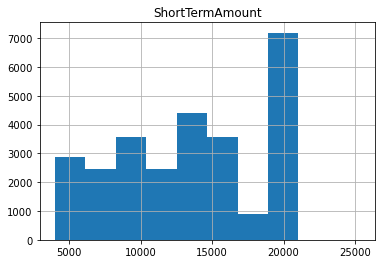

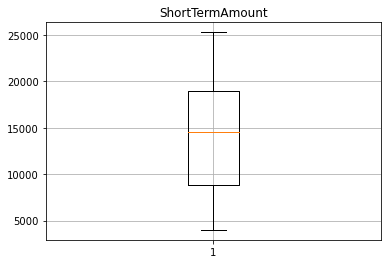

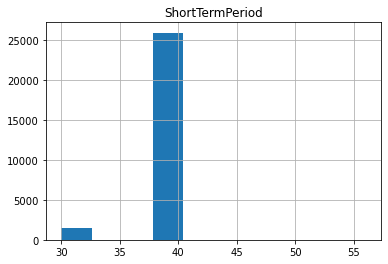

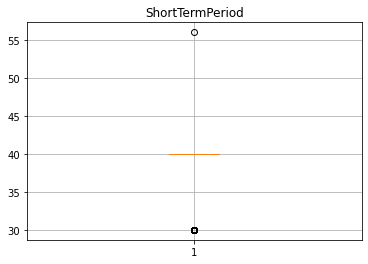

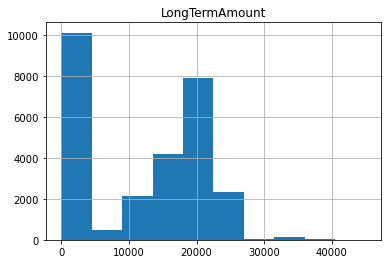

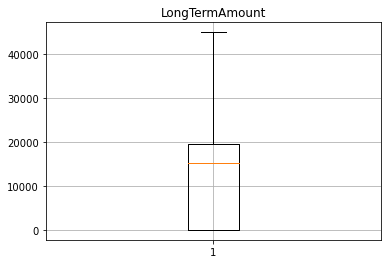

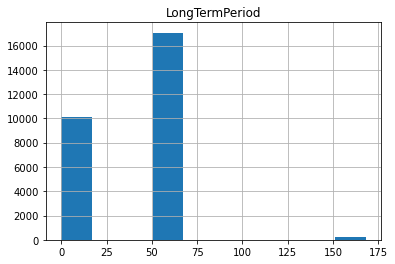

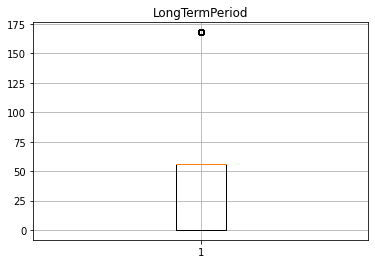

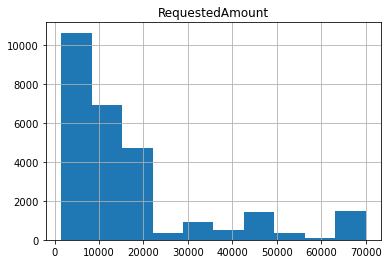

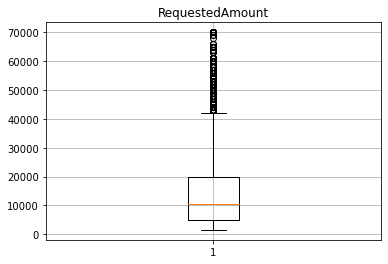

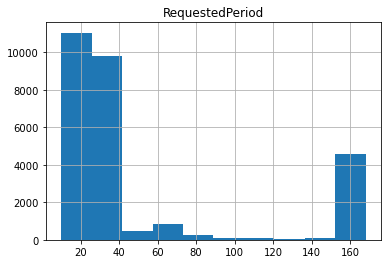

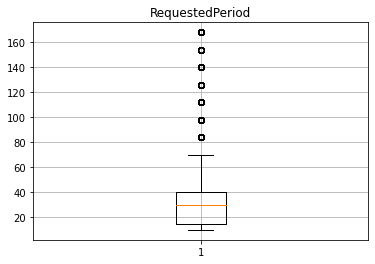

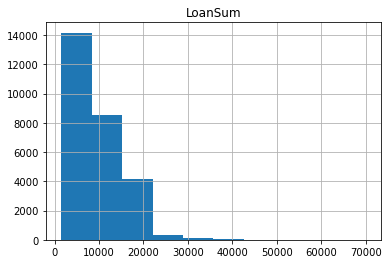

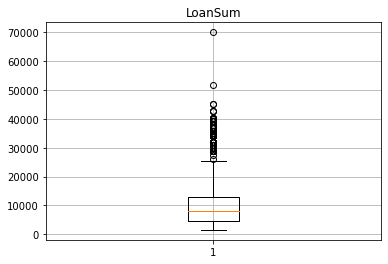

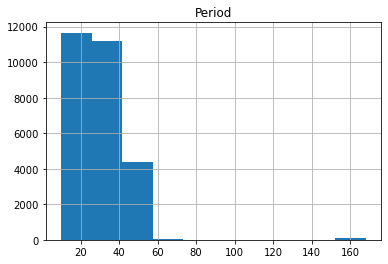

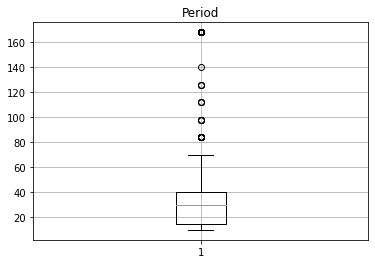

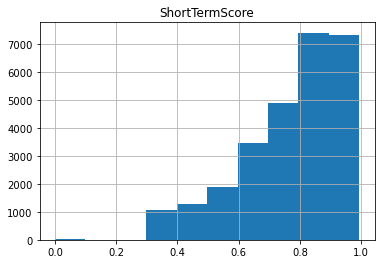

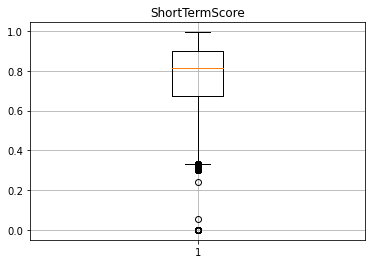

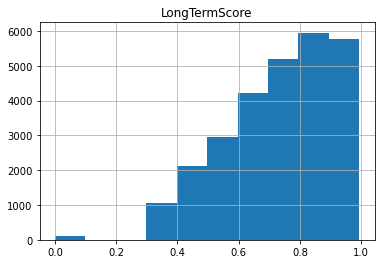

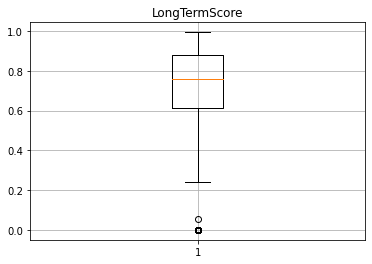

,Project,orderid,ClientID,ShortTermAmount,ShortTermPeriod,LongTermAmount,LongTermPeriod,RequestedAmount,RequestedPeriod,LoanSum,Period,ShortTermScore,LongTermScore
count,27384.000000,2.738400e+04,2.738400e+04,27384.000000,27384.000000,27384.000000,27384.000000,27384.000000,27384.000000,27384.000000,27384.000000,27384.000000,27384.000000
mean,0.137672,3.854944e+06,3.393809e+06,13375.350570,39.473269,11745.245399,36.198364,16934.688139,51.438723,9280.321903,29.124343,0.768575,0.730378
std,0.344561,8.226365e+05,1.207668e+06,5151.047472,2.237239,9689.637243,29.414887,17502.861072,54.984062,6064.123995,16.735572,0.166172,0.177016
min,0.000000,1.786991e+06,2.786000e+03,4000.000000,30.000000,0.000000,0.000000,1500.000000,10.000000,1500.000000,10.000000,0.000000,0.000000
25%,0.000000,4.154228e+06,2.595656e+06,8875.000000,40.000000,0.000000,0.000000,5000.000000,15.000000,4600.000000,15.000000,0.672085,0.611428
50%,0.000000,4.179198e+06,3.997114e+06,14500.000000,40.000000,15300.000000,56.000000,10500.000000,30.000000,8050.000000,30.000000,0.812124,0.760388
75%,0.000000,4.199482e+06,4.377327e+06,19000.000000,40.000000,19600.000000,56.000000,20000.000000,40.000000,13000.000000,40.000000,0.899994,0.877554
max,1.000000,4.220706e+06,4.457686e+06,25300.000000,56.000000,45000.000000,168.000000,70000.000000,168.000000,70000.000000,168.000000,0.993837,0.993837


In [13]:
for i in feature_columns:
    plt.figure()
    plt.grid()
    plt.hist(df_loaned[i])
    plt.title(i)
    plt.show()
    plt.boxplot(df_loaned[i])
    plt.grid()
    plt.title(i)
    plt.show()

df_loaned.describe()

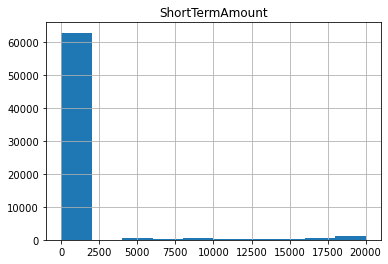

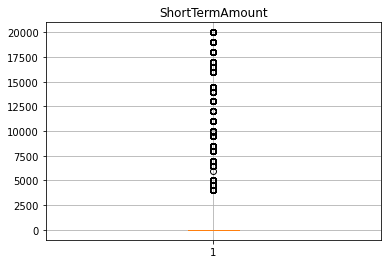

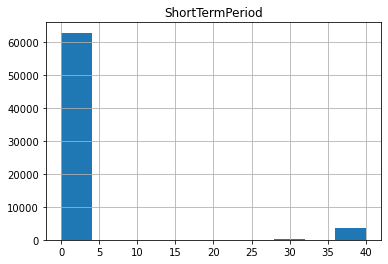

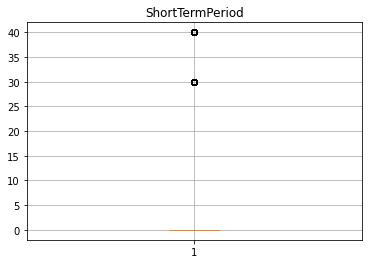

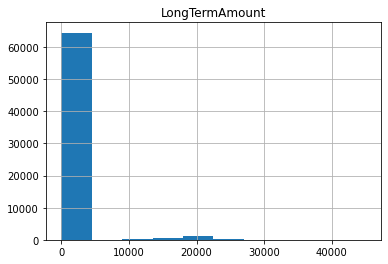

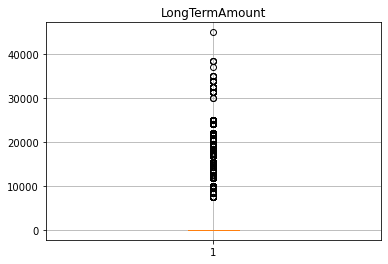

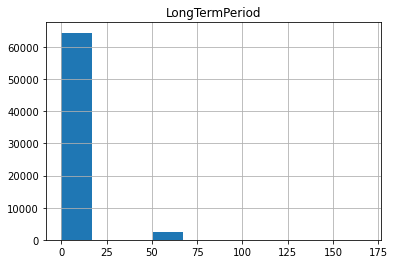

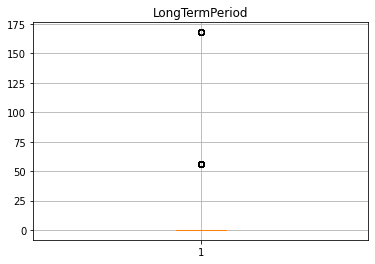

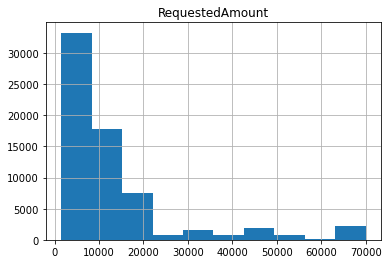

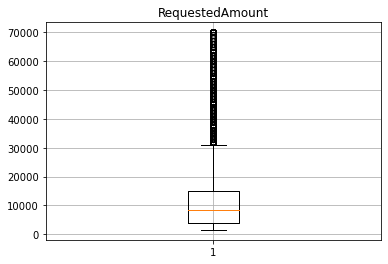

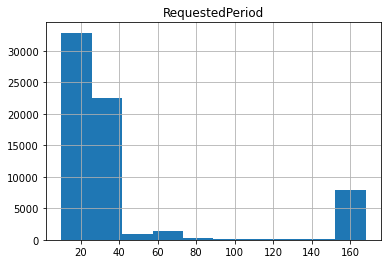

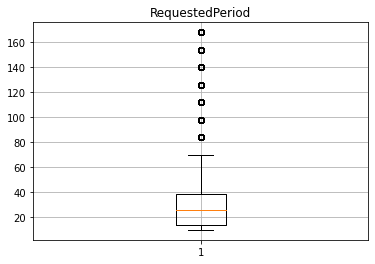

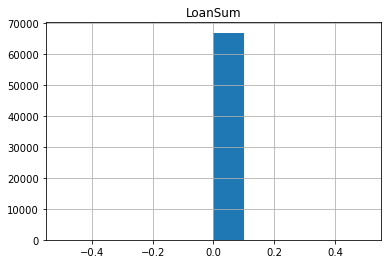

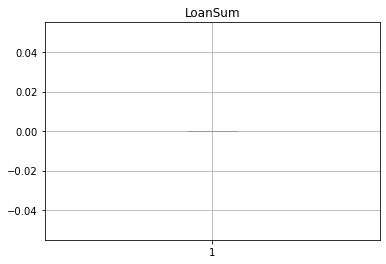

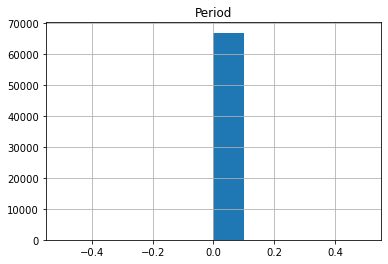

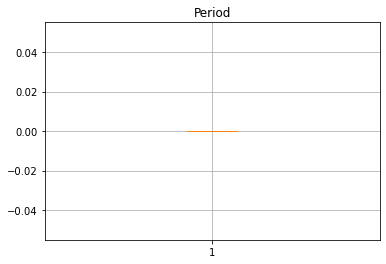

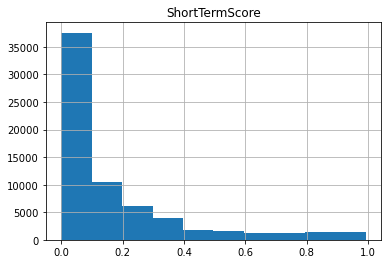

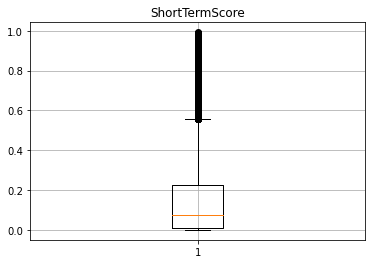

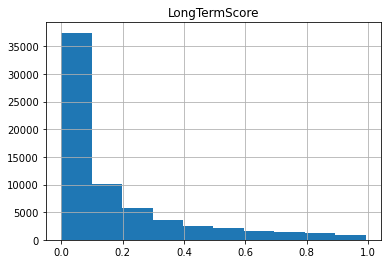

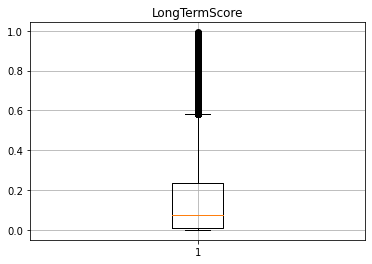

,Project,orderid,ClientID,ShortTermAmount,ShortTermPeriod,LongTermAmount,LongTermPeriod,RequestedAmount,RequestedPeriod,LoanSum,Period,ShortTermScore,LongTermScore
count,66787.000000,6.678700e+04,6.678700e+04,66787.000000,66787.000000,66787.000000,66787.000000,66787.000000,66787.000000,66787.0,66787.0,66787.000000,66787.000000
mean,0.211658,3.675829e+06,3.316965e+06,764.788058,2.302095,651.941246,2.009852,13117.263839,42.344348,0.0,0.0,0.167740,0.170618
std,0.408487,9.741533e+05,1.324934e+06,3333.856775,9.254674,3545.122031,10.905873,14978.911245,48.622099,0.0,0.0,0.227675,0.226176
min,0.000000,1.786974e+06,2.398000e+03,0.000000,0.000000,0.000000,0.000000,1500.000000,10.000000,0.0,0.0,0.000000,0.000000
25%,0.000000,4.145450e+06,1.977790e+06,0.000000,0.000000,0.000000,0.000000,4000.000000,14.000000,0.0,0.0,0.009121,0.009035
50%,0.000000,4.169149e+06,4.074427e+06,0.000000,0.000000,0.000000,0.000000,8500.000000,26.000000,0.0,0.0,0.074975,0.075136
75%,0.000000,4.194581e+06,4.420866e+06,0.000000,0.000000,0.000000,0.000000,15000.000000,39.000000,0.0,0.0,0.227919,0.237931
max,1.000000,4.220709e+06,4.457704e+06,20000.000000,40.000000,45000.000000,168.000000,70000.000000,168.000000,0.0,0.0,0.992363,0.992363


In [14]:
for i in feature_columns:
    plt.figure()
    plt.grid()
    plt.hist(df_declined[i])
    plt.title(i)
    plt.show()
    plt.boxplot(df_declined[i])
    plt.grid()
    plt.title(i)
    plt.show()

df_declined.describe()

# Работа с данными

Найдем долю авторассмотрений относительно общего числа заявок.

In [15]:
auto_decision_count = len(df[df['AutoDecision'] == True].index)
manual_approvement_count = len(df[df['ManualApprove'] == True].index)
manual_count = len(df[df['IsManual'] == True].index)
blocked_count = len(df[df['IsBlocked'] == True].index)
total_count = len(df.index)

auto_proportion = round(auto_decision_count/total_count * 100, 2)
manual_approvement_proportion = round(manual_approvement_count/total_count * 100, 2)
manual_proportions = round(manual_count/total_count * 100, 2)
blocked_proportion = round(blocked_count/total_count * 100, 2)

print ('Доля автоматических решений', auto_proportion, '%')
print ('Доля заявок с андеррайтингом', manual_approvement_proportion, '%')
print ('Доля ручных заявок', manual_proportions, '%')
print ('Доля заблокированных заявок', blocked_proportion, '%')

auto_proportion + manual_approvement_proportion + manual_proportions + blocked_proportion


Доля автоматических решений 20.8 %
Доля заявок с андеррайтингом 12.43 %
Доля ручных заявок 16.79 %
Доля заблокированных заявок 66.77 %


116.78999999999999

Сумма 116,78% - похоже на то, что ручные заявки учтены в андеррайтинге и заблокированных заявках. 

In [16]:
print (df[df['IsManual'] == True]['IsBlocked'].unique())
print (df[df['IsManual'] == True]['ManualApprove'].unique())


[False  True]
[ True False]


Для удобства дальнейшей работы с данными, создадим новый признак "type_of_decision", в котором будем хранить значение способа рассмотрения заявки. 

In [17]:
type_of_decision = []
for i in range(len(df.index)):
    if df['AutoDecision'][i] == True:
        type_of_decision.append('auto')
    elif df['ManualApprove'][i] == True:
        type_of_decision.append('manual')
    elif df['IsManual'][i] == True  and df['IsBlocked'][i] == True:
        type_of_decision.append('manual_block')
    elif df['IsBlocked'][i] == True:
        type_of_decision.append('blocked')
    else:
        type_of_decision.append('unknown')
df['type_of_decision'] = type_of_decision

Посмотрим на распределение количества заявок, по способу рассмотрения. 

([<matplotlib.patches.Wedge at 0x7f7de88627f0>,
 [Text(0.8733128825647352, 0.6688233018865846, 'auto'),
  Text(-1.0912885981588754, -0.13816365487506688, 'blocked'),
  Text(0.8656707358411829, -0.6786856246511969, 'manual'),
  Text(1.0896462972930425, -0.15056874441783277, 'manual_block'),
  Text(1.0999999993917604, -3.658042085775663e-05, 'unknown')])

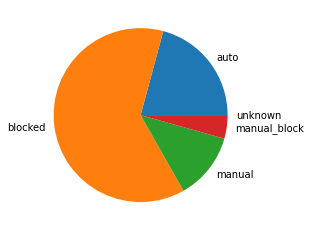

In [87]:
pivot_channels = pd.pivot_table(df, index= 'type_of_decision', values = 'ClientID', aggfunc='count').reset_index()
pivot_channels
plt.pie(pivot_channels['ClientID'], labels=pivot_channels['type_of_decision'])

### Исследуем уровни одобрения заявок

In [77]:
approved_rate = len(df[(df['ShortTermAmount'] > 0) | (df['LongTermAmount'] > 0)].index)/total_count * 100
print ('общий уровень одобрения составляет:', approved_rate)

общий уровень одобрения составляет: 33.22785146170265


Посмотрим на уровень одобрения среди постоянных клиентов и нового траффика. Для этого введем новый признак 'is_approved', принамающий значение True, в случае, если была одобрена сумма отличная от нуля или на краткосрочный займ, или на долгосрочный займ. 

In [74]:
df['is_approved'] = (df['ShortTermAmount'] > 0) | (df['LongTermAmount'] > 0)
pivot_is_approved = pd.pivot_table(df, index = 'IsRepeat', values='is_approved', aggfunc='mean').reset_index()
pivot_is_approved

,IsRepeat,is_approved
0,False,0.172915
1,True,1.000000


Видим, что процент одобрений для постоянных клиентов = 100%, проверим, каким образом распределены способы принятий решений в когорте постоянных клиентов.

In [75]:
pivot_is_approved_channels = pd.pivot_table(df[df['IsRepeat'] == True], index = 'type_of_decision', values='is_approved', aggfunc='count').reset_index()
pivot_is_approved_channels

,type_of_decision,is_approved
0,auto,12804
1,manual,5341


Для постоянных клиентов доля ручных рассмотрений составляет примерно 30%. При том, что 100% заявок одобрены. Это явная точка для оптимизации процессов. 
Проверим, что так продолжается до сих пор. Возьмем максимальную дату по заявке, где тип рассмотрения = ручной, постоянный клиент = true и сравним с максимальной датой заявки во всем датафрейме

In [24]:
print ('Последняя дата выдачи займа ручному клиенту с андеррайтингом:',max (df[(df['type_of_decision'] == 'manual') & (df['IsRepeat'] == True)]['OrderDate']))
print ('Последняя дата выдачи займа:', max(df['OrderDate']))

Последняя дата выдачи займа ручному клиенту с андеррайтингом: 2020-07-09 18:34:17.991000
Последняя дата выдачи займа: 2020-07-09 20:08:24.925000


Также, дополнительно убедимся в том, что для постоянных клиентов нет отказов со статусом 'blocked'. 

In [76]:
print('Количество заблокированных постоянных клиентов:', len(df[(df['IsRepeat'] == True) & (df['IsBlocked'] == True)].index))

Количество заблокированных постоянных клиентов: 0


В приведенном датафрейме все постоянные кликенты получили одобрение. При этом 30% заявок были рассмотрены с привлечением сотрудников компании. 
Данные позволяют сформулировать гипотезу о том, что всех постоянных клиентов можно рассматривать автоматически.

Вернемся к уровням одобрения среди нового траффика. 
Доля отказов среди нового бизнеса составляет 83%. 

На первый взгляд, rejection rate выглядит высоким. Стоит обратить внимание и провести исследование бенчмарков на рынке и, возможно, провести ревью каналов привлечения нового бизнеса. 

Вот, например, данные по отказам в кредитах в Нью Йорке за 2021 год (с понятными допущениями о том, что это другой рынок и другой продукт): 
https://www.newyorkfed.org/newsevents/news/research/2021/20211122#:~:text=Rejection%20Rates,-Reported%20average%20rejection&text=The%20average%20rejection%20rate%20for,point%20to%203.7%25%20in%202021.

Доля отказов в кредитах составляет ±25% в зависимости от вида кредитования. 

### Клиентские отказы от одобренных заявок

Найдем количество клиентов, которые получили одобрение о займе со стороны компании, но не взяли займ. 

In [89]:
print ('Количество займов, которые не взял клиент:',len(df[(df['is_approved'] == True) & (df['LoanSum'] == 0)].index))
print ('Общее количество одобренных займов:', len(df[df['is_approved'] == True].index))

Количество займов, которые не взял клиент: 3907
Общее количество одобренных займов: 31291


Видно, что почти каждый 10 одобренный займ не выдается клиенту. 
Основные гипотезы, почему это так:
1. Неудовлетворительные условия - сумма или срок
2. Долгий срок рассмотрения заявки. -> клиент берет займ у конкурентов. 

Проанализируем, каким способом были рассмотрены заявки, в которых клиент отказался от займа. 

In [90]:
pivot_rejected_by_client = pd.pivot_table(df[(df['is_approved'] == True) & (df['LoanSum'] == 0)], index= 'type_of_decision', values='is_approved', aggfunc='count').reset_index()
pivot_rejected_by_client

,type_of_decision,is_approved
0,auto,2086
1,manual,1821


Найдем долю отказов клиентов от в каждом из случаев. 

In [101]:
# Сводная таблица заявок по каналам.
approval_rate_by_channels = pd.pivot_table(df, index = df['type_of_decision'], values='is_approved', aggfunc=['count', 'sum']).reset_index()

# Переменные для расчета уровня отказов среди ручных рассмотрений.
manual_rejections_count = pivot_rejected_by_client[pivot_rejected_by_client['type_of_decision'] == 'manual']['is_approved'].reset_index(drop = True).values
manual_approvals_count = approval_rate_by_channels[approval_rate_by_channels['type_of_decision'] == 'manual']['count']['is_approved'].reset_index(drop = True).values


# Переменные для расчета уровня отказов среди авто рассмотрений.
auto_rejections_count = pivot_rejected_by_client[pivot_rejected_by_client['type_of_decision'] == 'auto']['is_approved'].reset_index(drop = True).values
auto_approvals_count = approval_rate_by_channels[approval_rate_by_channels['type_of_decision'] == 'auto']['count']['is_approved'].reset_index(drop = True).values

manual_rejections_rate = manual_rejections_count/manual_approvals_count
auto_rejections_rate = manual_rejections = auto_rejections_count/auto_approvals_count

print ('Доля отказов среди ручных рассмотрений:', manual_rejections_rate[0])
print ('Доля отказов среди авто рассмотрений:', auto_rejections_rate[0])

Доля отказов среди ручных рассмотрений: 0.15562772412614306
Доля отказов среди авто рассмотрений: 0.10647746414169772


Проведем тест статисчтической значимости с доверительным интервалом 95%. 

In [102]:
print ('Доверительный интервал конверсий отказов клиентов для ручного и авторассмотрений:',trust_interval_conv(manual_rejections_rate[0], auto_rejections_rate[0], manual_approvals_count, auto_approvals_count, 1.96))

Доверительный интервал конверсий отказов клиентов для ручного и авторассмотрений: (-5.701149301761296, -4.128902695127774)


Интервал не содержит 0, значит клиенты, рассматриваемые вручную статистически значимо чаще отказываются от предложений.
Сравним условия, которые предлагаются клиентам по итогам рассмотрения заявок вручную и автоматически. 

In [103]:
approved_ammount_array = []
for i in range(len(df.index)):
    if df['ShortTermAmount'][i]>=df['LongTermAmount'][i]:
        approved_ammount_array.append(df['ShortTermAmount'][i])
    else:
        approved_ammount_array.append(df['LongTermAmount'][i])
df['max_approved_amount'] = approved_ammount_array

In [104]:
pd.pivot_table(df[df['is_approved'] == True], index = 'type_of_decision', values=['RequestedAmount', 'max_approved_amount', 'LoanSum'], aggfunc='median')

,LoanSum,RequestedAmount,max_approved_amount
type_of_decision,,,
auto,8050,10000,18400
manual,5750,14000,8500


Меньшая доля откзаов клиентов при автоматическом рассмотрении заявки может объясняться тем, что медианная одобренаня сумма выше запрошенной и выше, чем при ручном рассмотрении заявки.

Также, стоит обратить внимание на то, что при авторассмотрении медианная одобренная сумма клиенту выше, чем запрошенная. В двух направлениях для исследования: 
    1. Берут ли клиенты, которым одобрили сумму выше запрашиваемой, большую сумму, чем было запрошено. 
    2. Сравнить основные показатели двух когорт клиентов - взявших выше запрошенной суммы и в пределах запрошенной суммы.

Также, необходимо отдельно проанализировать срок рассмотрения заявки вручную, чтобы опровергнуть или подтвердить гипотезу # 2. 

**Посмотрим на долю нового бизнеса и повторных кредитов**

In [35]:
num_tries = pd.pivot_table(df, index='ClientID', values='IsRepeat', aggfunc='count').reset_index()
num_tries[num_tries['IsRepeat']>3]

,ClientID,IsRepeat
6,3840,4
184,126507,9
390,269898,4
585,363228,4
1503,720349,4
...,...,...
75572,4435199,4
77378,4438652,4
81388,4446275,13
81435,4446370,4


count    86939.000000
mean         1.083185
std          0.370724
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         16.000000
Name: IsRepeat, dtype: float64

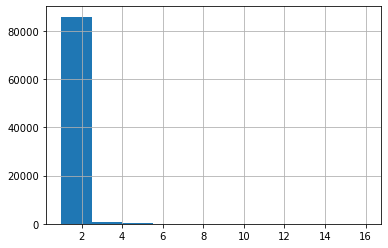

In [36]:
num_tries['IsRepeat'].hist()
num_tries['IsRepeat'].describe()

Более 75% клиентов делают расчет заявки не более одного раза. 
Проверим, этот же покзаатель в когорте одобренных клиентов. 

In [37]:
num_tries = pd.pivot_table(df[df['is_approved']==True], index='ClientID', values='IsRepeat', aggfunc='count').reset_index()

count    25410.000000
mean         1.231444
std          0.611971
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         16.000000
Name: IsRepeat, dtype: float64

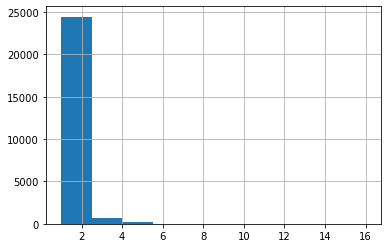

In [38]:
num_tries['IsRepeat'].hist()
num_tries['IsRepeat'].describe()

Retention также крайне низкий. 
Проверим разницу дат, за которую нам доступна выборка.

In [39]:
print(max(df['OrderDate']))
print(min(df['OrderDate']))

2020-07-09 20:08:24.925000
2020-06-04 05:24:49.009000


Дело в том, что выборка за один календарный месяц. Поэтому все гипотезы и выводы выше - не основательны.

# Выводы
1. Авторассматривать постоянных клиентов.
---
Уровень одобрения заявок постоянных клиентов составляет 100%, при этом уровень ручных рассмотрений составляет 30%. 
Можно сформулировать гипотезу об изменении андеррайтинговых правил для этой когорты, чтобы повысить уровень авторассмотрений. Следующие шаги:
1. Более детально изучить суммы и причины отправки клиентов на ручной андеррайтинг. 
2. Сравнить согласованные врчуную уловия с запрашиваемыми. 
3. Сравнить срерднюю согласованную сумму с суммой, при достижении которой включается ручной андеррайтинг. 


2. Исследовать высокий rejection rate в новом бизнесе. 
---
На основании данных видно, что только 17% новых клиентов получают одобрение заявки. Необходимо более детально изучить каналы и триггеры привлечения клиентов, а также провести исследовние для поиска рыночных бенчмарков данного покзателя. Следующие шаги:

0. Разделить новый бизнес на каналы привлечения (быть может значительная доля отказов - органический, бесплатный траффик). 
1. Посчитать product/channel fit для каждого канала.
2. Провести конкуретный анализ каналов роста и rejection rate.  
3. Совместно с командой маркетинга внести корректировки в модель роста продукта на основании инсайтов из п.1 


3. Исследовать уровень отказов клиентов от одобренных компанией заявок. 
---
Данные показывают, что приблизительно каждая 10 одобренная заявка не превращается в займ по инициативе, а точнее отсутствию инициативы со стороны клиента. При этом, проблема более характерна для заявок, рассмотренных вручную. 
Основные гипотезы: 
    1. Плохие условия (хуже, чем у конкурентов или относительно того, что хотел клиент). 
    2. Долгое рассмотрение заявки - для ручного андеррайтинга. 
В качестве дальнейших шагов, я бы предложил провести user research и пообщаться с реальными клиентами, кто отказался от займа, при этом получил одобрение на всю запрошенную сумму. 

4. Дисбаланс одобренных сумм при авторассмотрении и ручном андеррайтинге. 
---
По текущему датасету можно предположить, что размер запрошенной суммы - один из факторов отправки на андеррайтинг (медианная сумма для авторешений 10 000 р. vs 14 000 р. для ручного андеррайтинга). При этом, медианная одобренная сумма при автопринятии решений выше, чем при ручном андеррайтинге. Это хорошая точка для исследования рентабельности двух когорт клиентов, для исследования корреляции взятой суммы относительно запрошенной 